### Выполнил: Булыгин Л.П гр.428

#### Написать в функциональном стиле задачу приближенного вычисления корней функции

$$2(xy+y)y'+x(y^4+1)=0$$
с точностью $\epsilon=10^{-12}$

#### Подключаем библиотеки:

In [20]:
import numpy as np
import sympy
import matplotlib.pyplot as plt

### Указываем начальные условия:

In [21]:
x=sympy.symbols('x')
y=sympy.Function('y')(x)
x00=x0=0.5
y00=y0=2
h=0.01
E=10**(-4)#Точность
y_value=[] #Пустой список для 1й и 2й производной
t=[x0] #Пустой список для отрисовки(x)
yy=[] #Пустой список для отрисовки(y)

### Далее идут основные функции и методы:

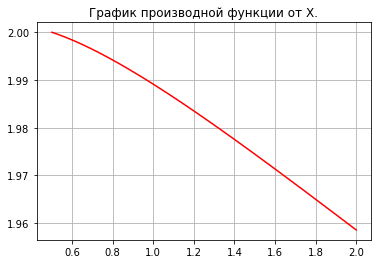

In [22]:
def factorial(n): 
    if n==0:
        return 1
    return factorial(n-1)

def value(f,t,yy): 
    f=sympy.Add(f)
    f=f.subs({x:t,y:yy})
    return float(f)

def neyavno(func): #Производная неявной функции с y=y(x)
    f=sympy.idiff(func,y,x)
    return f

def Teilor(y1,y2,x): 
    
    return y00+h*y1/factorial(1)*(x-x00)+(h/2)*y2/factorial(2)*(x-x00)**2

def delta_X(x,h):
    return x+h

funcc=-x*(y**4+1)/(2*(x*y+y)) #1я производная

val=value(funcc,x0,y0)
y_value.append(val)

func1=neyavno(funcc) #2я производная

val=value(func1,x0,y0)
y_value.append(val)

y0=Teilor(y_value[0],y_value[1],x0)
yy.append(y0)

while abs(x0)<2:
    
    x0=delta_X(x0, h) #Изменение x
    t.append(x0)
    
    y0=Teilor(y_value[0],y_value[1],x0)
    yy.append(y0)
    
    val=value(funcc,x0,y0) #Замена 1й производной при новом x
    y_value[0]=val
    
    val=value(func1,x0,y0) #Замена 2й производной при новом x
    y_value[1]=val
    
plt.plot(t,yy,'red')
plt.title('График приближенного вычисления.')
plt.grid()
plt.show()